# 05.02 numerical integration, newton-cotes

###### code, support for section text

In [ ]:
if True: # settings for the people
  import matplotlib.pyplot as plt
  import numpy as np
  from numpy import polynomial as npp


###### code, images in order of appearance

In [ ]:
# VISUAL, integration: a,b,c

def do_something():

  # problem, functions ~ integrands
  dfa = lambda x,h: x/h
  dfb = lambda x,h: 1 - pow(dfa(x,h),2)
  dfc = lambda x,h: pow((2*x-h)/(2*h),2) - h/4
  sfa = "$\\int_0^h\\; \\frac{x}{h}\\;dx = \\frac{h}{2}$\n"
  sfb = "$\\int_{-h}^h\\; P(x)\\;dx = x - \\frac{x^3}{3h^2} = \\frac{4}{3}h$\n"
  sfc = "$\\int_{-h}^h\\; P(x)\\;dx = \\frac{h}{3}$\n"
  sf = [sfa,sfb,sfc]

  # problem, interval
  xx = (-1,1) # interval for display
  h = 0.8     # step-size for integration

  # discrete points for display interval
  n = 201                  # number of points
  dx = (xx[1]-xx[0])/(n-1) # step-size between points
  xs = np.linspace(xx[0],xx[1],n) # xs for display

  # calculate discrete integrand values
  dfas = dfa(xs,h)
  dfbs = dfb(xs,h)
  dfcs = dfc(xs,h)
  df = [dfas,dfbs,dfcs]

  # subselection of relevant h within xx
  ix_hneg = np.where(xs==-h)[0][0]
  ix_zero = np.where(xs==0)[0][0]
  ix_thru = np.where(xs==h)[0][0]
  ix_from = [ix_zero,ix_hneg,ix_hneg]

  if True: # plot
    # plot, data
    fig,axs = plt.subplots(1,3,figsize=(10,10))
    for i,ax in enumerate(axs):
      ax.scatter([-h,h],[0,0],marker="|",zorder=11)
      ax.plot(xs,df[i],alpha=0.5)
      ax.fill_between(xs[ix_from[i]:(ix_thru+1)],df[i][ix_from[i]:(ix_thru+1)],0,color='lightblue',zorder=1)

    # plot, style
    for i,ax in enumerate(axs):
      ax.set_title(sf[i],y=-0.6,loc='center')
      ax.set_aspect("equal")
      ax.spines['left'].set_position('zero')
      ax.spines['bottom'].set_position('zero')
      ax.spines['right'].set_visible(False)
      ax.spines['top'].set_visible(False)
      ax.set_xticks([-1,1])
      ax.set_yticks([1])
      ax.set_ylim(h-1,2-h)

    # plot, show
    plt.show()


In [ ]:
# VISUAL, composite, evolved for section 05.02

def do_something_else(data,s_methods,panels=1,fancy=False,debug=False):

  #debug = False
  #fancy = False

  # labels
  sm_trapz = "trapezoid"
  sm_simps = "simpsons"
  sm_combo = "simpsons (and trapezoid)" # simpsons with trapezoid as background
  #s_methods = [sm_trapz]
  n_methods = len(s_methods)

  # data
  #data = np.array([[0,5],[4,10/3],[5/3,0],[6,4],[8,19/3]]) # f(x), eyeballed
  f = npp.polynomial.Polynomial.fit(data[:,0],data[:,1],deg=len(data)-1)
  if debug:
    print(f"\nf(x): {f}")

  # data, per panel
  #panels = 1 # panels
  xa = data[ 0,0] # np.min(data[:,0]) # if unordered
  xb = data[-1,0] # np.max(data[:,0]) # if unordered
  xs_n = np.linspace(xa,xb,panels+1) # include endpoints
  fs_n = f(xs_n)

  if True: # plot
    isize = 5
    fig,axs = plt.subplots(1,n_methods,figsize=(n_methods*isize,isize))
    if n_methods==1:
      axs = [axs]
    offset = 0.1

    # interval, display
    h = 0.1
    xs_dis = np.arange(xa-2*h,xb+3*h,h)
    fs_dis = f(xs_dis)

    # plot, background
    for i,ax in enumerate(axs):
      ax.plot([xa]*2,[0,f(xa)],color="0.9",zorder=10)
      ax.plot([xb]*2,[0,f(xb)],color="0.9",zorder=10)
      ax.plot(xs_dis,f(xs_dis),color="0.5",ls=":",label="$f(x)$",zorder=10)

    # plot per panel
    for i in range(panels):
      for iax,ax in enumerate(axs):
        if i == 0:
          # first x
          ax.scatter(xs_n[i],fs_n[i],color="0.5",zorder=20)
          ax.scatter(xs_n[i],[0],color="C0",marker="|",zorder=40)
          ax.text(xs_n[i]-offset,-4*offset,f"$x_{i}$",zorder=40)
        # next x
        i_display = i+1
        if (s_methods[iax] != sm_trapz) and (panels == 1): # special case for one-panel example
          i_display += 1
        ax.scatter(xs_n[i+1],fs_n[i+1],color="0.5",zorder=20)
        ax.scatter(xs_n[i+1],[0],color="C0",marker="|",zorder=40)
        ax.text(xs_n[i+1]-offset,-4*offset,f"$x_{i_display}$",zorder=40)

        # trapezoid behind simpsons
        if s_methods[iax] == sm_combo:
          ax.plot([xs_n[i],xs_n[i+1]],[fs_n[i],fs_n[i+1]],color="0.9",zorder=10)

        if s_methods[iax] == sm_trapz: # trapezoid, one panel at a time
          xs_trapz = np.array([xs_n[i],xs_n[i+1]])
          fs_trapz = np.array([fs_n[i],fs_n[i+1]])
          ax.plot(xs_trapz,fs_trapz,color="C0",zorder=10)
          if fancy: # complicate for area of integration and error
            # fit parabola to panel endpoints bc i was to lazy to generate linear
            p = npp.polynomial.Polynomial.fit(xs_trapz,fs_trapz,deg=1)

            # generate fit points for display
            xs_panel = np.arange(xs_n[i],xs_n[i+1]+h,h)
            ps_panel = p(xs_panel)

            # generate area of integration
            ax.fill_between(xs_panel,ps_panel,0,color="blue",alpha=0.2)

            # generate error for display
            fs_panel = f(xs_panel)
            ax.fill_between(xs_panel,ps_panel,fs_panel,color="red",alpha=0.2)

        else: # simpsons
          # midpoint added per panel for simpsons
          xm = (xs_n[i]+xs_n[i+1])/2
          ax.scatter(xm,f(xm),color="0.7",zorder=20)
          if panels == 1: # special case for one-panel example
            i_display = i+1
            ax.scatter(xm,[0],color="C0",marker="|",zorder=40)
            ax.text(xm-offset,-4*offset,f"$x_{i_display}$",zorder=40)

          # fit parabola to panel endpoints and panel midpoint
          xs_simps = np.array([xs_n[i],xm,xs_n[i+1]])
          fs_simps = f(xs_simps)
          p = npp.polynomial.Polynomial.fit(xs_simps,fs_simps,deg=2)

          # generate fit points for display
          xs_panel = np.arange(xs_n[i],xs_n[i+1]+h,h)
          ps_panel = p(xs_panel)
          ax.plot(xs_panel,ps_panel,color="C0",zorder=30)

          if fancy:
            # generate area of integration
            ax.fill_between(xs_panel,ps_panel,0,color="blue",alpha=0.2)

            # generate error for display
            fs_panel = f(xs_panel)
            ax.fill_between(xs_panel,ps_panel,fs_panel,color="red",alpha=0.2)

    # plot, style
    for i,ax in enumerate(axs):
      ax.set_title(s_methods[i],y=-0.15,loc='center')
      ax.set_aspect("equal")
      ax.spines['left'].set_visible(False)
      ax.spines['bottom'].set_position('zero')
      ax.spines['right'].set_visible(False)
      ax.spines['top'].set_visible(False)
      ax.set_xticks([])
      ax.set_yticks([])

    # plot, show
    plt.show()


In [ ]:
# data for do_something_else()
data = np.array([[0,5],[4,10/3],[5/3,0],[6,4],[8,19/3]]) # f(x), eyeballed

## 0 introduction

approximating functions to data points, interpolation and least squares get repurposed here.

eg, an interpolating polynomial is a polynomial. ie, its easy to integrate. so newton-cotes does that.

first, slot these basic integrals into memory.

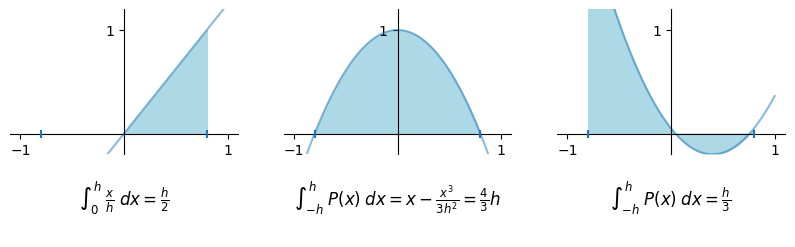

In [ ]:
do_something()

## 1 trapezoid rule

trapezoid rule replaces the function with the line interpolating $(x_0,f(x_0))$ and $(x_1,f(x_1))$.

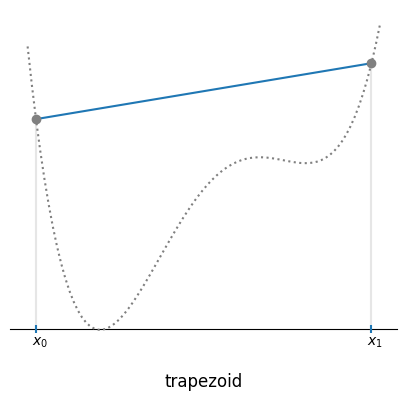

In [ ]:
do_something_else(data,["trapezoid"])

let $f(x)$ be a function with a continuous second derivative, defined on $[x_0,x_1]$, with $y_0 = f(x_0)$ and $y_1 = f(x_1)$. consider degree 1 interpolating polynomial $P_1(x)$ through $(x_0,y_0)$ and $(x_1,y_1)$.

apply lagrange.

$$f(x) = y_0\frac{x-x_1}{x_0-x_1} + y_1\frac{x-x_0}{x_1-x_0} + \frac{(x-x_0)(x-x_1)}{2!}f''(c_x) = P(x) + E(x)$$

ie, $c$ depends continuously on $x$. integrate both sides.

$$\int_{x_0}^{x_1} f(x)dx = \int_{x_0}^{x_1} P(x)dx+ \int_{x_0}^{x_1}E(x)dx$$

define $h = x_1 - x_0$.

$$\int_{x_0}^{x_1} P(x)dx = y_0\int_{x_0}^{x_1} \frac{x-x_1}{x_0-x_1}dx + y_1\int_{x_0}^{x_1} \frac{x-x_0}{x_1-x_0}dx = y_0\frac{h}{2} + y_1\frac{h}{2} = \frac{h}{2}(y_0+y_1)$$

let $w = -x + x_1$.

$$\int_{x_0}^{x_1} \frac{x-x_1}{x_0-x_1}dx = \int_0^h \frac{-w}{-h}(-dw) = \int_0^h \frac{w}{h}dw = \frac{h}{2}$$

let $w = x - x_0$.

$$\int_{x_0}^{x_1} \frac{x-x_0}{x_1-x_0}dx = \int_0^h \frac{w}{h}dw = \frac{h}{2}$$

let $u = x - x_0$. apply the mean value theorem.

\begin{align}
  \int_{x_0}^{x_1}E(x)dx &= \frac{1}{2!} \int_{x_0}^{x_1} (x-x_0)(x-x_1) f''(c(x))dx \\
  \\
  &=\frac{f''(c)}{2} \int_{x_0}^{x_1} (x-x_0)(x-x_1)dx \\
  \\
  &=\frac{f''(c)}{2} \int_0^h u(u-h)du \\
  \\
  &=\frac{h^3}{12} f''(c)
\end{align}

##### <b>trapezoidal rule</b>


$$\int_{x_0}^{x_1} f(x)dx = \frac{h}{2}(y_0 + y_1) - \frac{h^3}{12}f''(c)$$

where $h = x_1 - x_0$ and $c$ is between $x_0$ and $x_1$.

## 2 simpsons rule

simpsons rule uses the parabola interpolating the function at three points $(x_0,f(x_0)), (x_1,f(x_1)), (x_2,f(x_2))$.

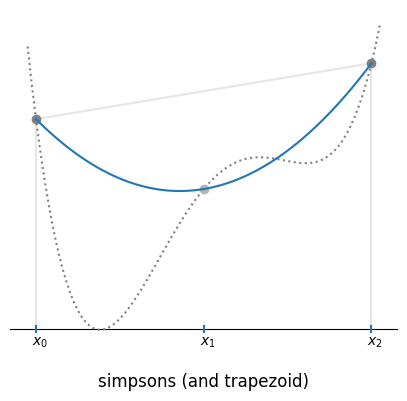

In [ ]:
do_something_else(data,["simpsons (and trapezoid)"])y0h3+y14h3+y2h

its like trapezoidal but of degree 2, surprise.

\begin{align}
  f(x) &= y_0 \frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)} + y_1 \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)} \\
  \\
  &\quad + y_2 \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)} + \frac{(x-x_0)(x-x_1)(x-x_2)}{3!}f'''(c_x) \\
  \\
  &= P(x) + E(x)
\end{align}

##### <b>simpsons rule</b>

$$\int_{x_0}^{x_2} f(x)dx = y_0\frac{h}{3} + y_1\frac{4h}{3} + y_2\frac{h}{3} - \frac{h^5}{90}f^{(iv)}(c)$$

where $h = x_2 - x_1 = x_1 - x_0$ and $x_0 < c < x_2$.

##### example 06

apply trapezoid rule and simpsons rule to approximate

$$\int_1^2 ln\; x\;dx,$$

and find an upper bound for the approximation error.

trapezoid:

\begin{align}
  \int_1^2 ln \text{ }x \text{ }dx
    &\approx \frac{h}{2}(y_0+y_1)
    = \frac{1}{2}(ln\; 1 + ln\; 2)
    = \frac{ln\; 2}{2}
    \approx 0.3466 \\
  \\
  \text{error }
    &= \frac{h^3}{12}\; f''(c) \\
  \\
  &\Downarrow \quad f''(x) = -\frac{1}{x^2}, 1 < c < 2 \\
  \\
  &= \frac{1^3}{12}\; \frac{1}{c^2}
    \le \frac{1}{12} \approx 0.0834. \\
  \\
  \int_1^2 ln\; x\; dx &= 0.3466 \pm 0.0834 \\
  \\
  \uparrow\text{ by } & \text{approximation }
    \text{and exactly by }\downarrow \\
  \\
  \int_1^2 ln\; x\; dx
    &= x\; ln\; x|_1^2 - \int_1^2 dx \\
    &= 2\; ln\; 2 - 1\; ln\; 1
    \approx 0.386294. \quad\checkmark
\end{align}

simpsons:

\begin{align}
  \int_1^2 ln\; x\; dx
    &\approx \frac{h}{3}(y_0+4y_1+y_2)
    = \frac{0.5}{3} \left( ln\; 1 + 4ln\frac{3}{2} + ln\; 2 \right)
    \approx 0.3858 \\
  \\
  \text{error }
    &= -\frac{h^5}{90}\; f^{(iv)}(c) \\
  \\
  &\Downarrow \quad f^{(iv)}(x) = -\frac{6}{x^4}, 1 < c < 2 \\
  \\
  &= \frac{6(0.5)^5}{90c^4}
    \le \frac{6(0.5)^5}{90}
    = \frac{1}{480} \approx 0.0021 \\
  \\
  \int_1^2 ln\; x\; dx &= 0.3858 \pm 0.0021
    \quad\text{by approximation}. \quad\checkmark
\end{align}

one way of comparing numerial integration rules is by comparing error terms.

<b><font color=grey>definition</font> degree of precision</b> of numerical integration method is the greatest integer $k$ for which all degree $k$ or less polynomials are integrated exactly by the method. eg, degree 1 trapezoidal rule is exact for polynomial of degree 1 or less. also, by the error, simpsons is degree 3.

##### <b>simpsons $\frac{3}{8}$ rule</b>

$$\int_{x_0}^{x_3} f(x)dx \approx \frac{3h}{8}(y_0 + 3y_1 + 3y_2 + y_3)$$

##### example 07

find the degree of precision of the degree 3 newton-cotes formula, simpsons $\frac{3}{8}$ rule.

\begin{align}
  \frac{3h}{8}&(y_0 + 3y_1 + 3y_2 + y_3) \\
  \\
  &\Downarrow \quad \text{eg, } f(x) = x^2 \\
  \\
  &= \frac{3h}{8}(x^2 + 3(x+h)^2 + 3(x+2h)^2 + (x+3h)^2) \\
  &= \frac{(x-3h)^3-x^3}{3} = \int_x^{x+h} x^2.
\end{align}

this holds for $1,x,x^2,x^3$ but fails for $x^4$. therefore, degree of precision of rule is three.

## 3 composite newton-cotes

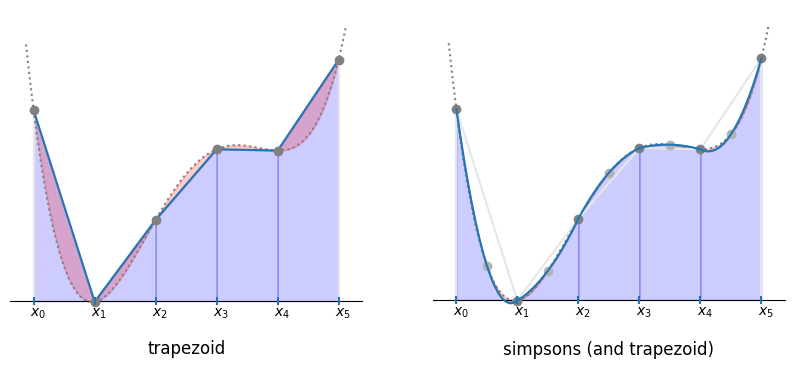

In [ ]:
do_something_else(data,["trapezoid","simpsons (and trapezoid)"],panels=5,fancy=True)

(a) composite trapezoid rule sums the trapezoid rule on $m$ adjacent subintervals. (b) composite simpsons rule does the same for simpsons rule.

trapezoidal and simpsons work over intervals. <b>composite numerical integration</b> means to divide an interval into subintervals or <b>panels</b> for better error.

composite trapezoidal sums trapezoid rule approximations on adjacent intervals. to approximate

$$\int_a^b f(x) dx$$

consider evenly spaced grid,

$$a = x_0 < x_1 < x_2 < \dots < x_{m-2} < x_{m-1} < x_{m} = b$$

where $h = x_{i+1} - x_i$. for each subinterval,

$$\int_{x_i}^{x_{i+1}} f(x)dx = \frac{h}{2}(f(x_i) + f(x_{i+1})) - \frac{h^3}{12}f''(c_i)$$

where $f''$ is continuous. adding up subintervals,

\begin{align}
  \int_a^b f(x)dx
    &= \frac{h}{2} \left[
    (f(a) + f(b) + \underbrace{2\sum_{i=1}^{m-1} f(x_i)}_{\text{internal borders}}
    \right] - \underbrace{
    \sum_{i=0}^{m-1} \frac{h^3}{12}f''(c_i)}_{\text{error}} \\
  \\
  \text{error}
  &= \frac{h^3}{12} \sum_{i=0}^{m-1} f''(c_i)
  = \frac{h^3}{12} m f''(c)
  = \frac{(b-a)h^2}{12}f''(c),
    \quad a<c<b, mh = (b-a). \\
  &\Downarrow
\end{align}

##### <b>composite trapezoidal rule</b>

$$\int_a^b f(x)dx = \frac{h}{2} \left( y_0 + y_m + 2\sum_{i=1}^{m-1}y_i \right) - (b-a)\frac{h^2}{12}f''(c)$$

where $h = (b-a)/m$ and $c$ is between $a$ and $b$.

##### usw

composite simpsons sums simpsons rule approximations similarly. consider evenly spaced grid,

$$a = x_0 < x_1 < x_2 < \dots < x_{2m-2} < x_{2m-1} < x_{2m} = b$$

where each $h = x_{i+1} - x_i$. on each length $2h$ subinterval $[x_{2i},x_{2i+2}]$, execute simpsons. ie, the interpolating parabola fits to $[x_{2i},x_{2i+1},s_{2i+2}]$.

$$\int_{x_{2i}}^{x_{2i+2}} f(x)dx = \frac{h}{3}[f(x_{2i}) + 4f(x_{2i+1}) + f(x_{2i+2})] - \frac{h^5}{90}f^{(iv)}(c_i)$$

where $f^{(iv)}$ is continuous. adding up subintervals,

\begin{align}
  \int_a^b f(x)dx
    &= \frac{h}{3} \left[
    (f(a) + f(b) +
      \underbrace{4\sum_{i=1}^m f(x_{2i-1})}_{\text{simpsons}}
    + \underbrace{2\sum_{i=1}^{m-1} f(x_{2i})}_{\text{internal borders}}
    \right] - \underbrace{
    \sum_{i=0}^{m-1} \frac{h^5}{90}f^{(iv)}(c_i)}_{\text{error}} \\
  \\
  \text{error}
  &= \frac{h^5}{90} \sum_{i=0}^{m-1} f^{(iv)}(c_i)
  = \frac{h^5}{90} m f^{(iv)}(c)
  = (b-a)\frac{h^4}{180}f^{(iv)}(c),
    \quad a<c<b, m\cdot 2h = (b-a). \\
  &\Downarrow
\end{align}

##### <b>composite simpsons rule</b>

$$\int_a^b f(x)dx = \frac{h}{3}\left[ y_0 + y_{2m} + 4\sum_{i=1}^m y_{2i-1} + 2\sum_{i=1}^{m-1}y_{2i} \right] - \frac{(b-a)h^4}{180}f^{(iv)}(c)$$

where $c$ is between $a$ and $b$.

##### example 08

carry out four-panel approximations of

$$\int_1^2 ln\; x\; dx$$

using the composite trapezoid rule and composite simpsons rule.

trapezoid rule with $a=1,b=2,h=\frac{b-a}{4}=\frac{1}{4}$:

\begin{align}
  \int_1^2 ln\; x\; dx &\approx \frac{\frac{1}{4}}{2}
    \left[ y_0 + y_4 + 2\sum_{i=1}^3 y_i \right] \\
  &= \frac{1}{8} \left[ ln1 + ln2 + 2\left(ln\frac{5}{4} + ln\frac{6}{4} + ln\frac{7}{4}\right) \right] \\
  &\approx 0.3837 \\
  \\
  \text{error }
    &= (b-a)\frac{h^2}{12} |f''(c)|
    = \frac{\frac{1}{16}}{12}\frac{1}{c^2}
    \le \frac{1}{(16)(12)(1^2)} = \frac{1}{192} \approx 0.0052.
\end{align}

simpsons rule with $a=1,b=2,2h=\frac{b-a}{4}=\frac{1}{8}$:

\begin{align}
  \int_1^2 ln\; x\; dx &\approx \frac{\frac{1}{8}}{3}
    \left[ y_0 + y_8 + 4\sum_{i=1}^4 y_{2i-1} + 2\sum_{i=1}^3 y_{2i} \right] \\
  &= \frac{1}{24} \left[ ln1 + ln2
    + 4\left( ln\frac{9}{8} + ln\frac{11}{8} + ln\frac{13}{8} + ln\frac{15}{8} \right)
    + 2\left( ln\frac{5}{4} + ln\frac{6}{4} + ln\frac{7}{4} \right)\right] \\
  &\approx 0.386292 \\
  \\
  \text{error }
    &= (b-a)\frac{h^4}{180} |f^{(iv)}(c)|
    = \frac{1}{180}\frac{6}{c^4}
    \le \frac{6}{(8^4)(180)(1^4)} = \approx 0.000008.
\end{align}

##### example 09

find the number of panels $m$ necessary for the composite simpsons rule to approximate

$$\int_0^{\pi} sin^2x\; dx$$

within six correct decimal places.

\begin{align}
  \frac{(\pi - 0)h^4}{180}|f^{(iv)}(c)| &< 0.5\times 10^{-6} \\
  \\
  &\Downarrow \quad f^{(iv)}(x) = -8cos\text{ }2x \\
  \\
  \frac{\pi h^4}{180}8 &< 0.5\times 10^{-6} \\
  \\
  &\Downarrow \\
  \\
  h &< 0.0435, m = \text{ceil}(\frac{\pi}{2h}) = 37 \text{ panels}.
\end{align}

## 4 open newton-cotes

trapezoidal and simpsons require values at the end points. open newton-cotes does not use end points, allowing integrands removable singularities at those end points.

##### <b>midpoint rule</b>

$$\int_{x_0}^{x_1} f(x)dx = hf(w) + \frac{h^3}{24}f''(c)$$

where $f''$ continuous on $[a,b]$, $h = (x_1 - x_0)$, midpoint $w = x_0 + \frac{h}{2}$, $x_0 < c < x_1$. this method requires only one function evaluation and the error term is suspiciously half that of trapezoidal.

find $f'(x)$ where $f(x) = x^{x^x}$.

###### proof-lite

similar to the derivation of the trapezoid rule. set $h = x_1 = x_0$. degree one taylor expansion of $f(x)$ about interval midpoint $w = x_0 + \frac{h}{2}$

\begin{align}
  f(x) &= f(w) + (x-w)f'(x) + \frac{1}{2}(x-w)^2f''(c_x)
    \quad x_0 < c_x < x_1, c_x \text{ depends on } x \\
  \\
  &\Downarrow \\
  \\
  \int_{x_0}^{x_1} f(x) dx
    &= (x_1 - x_0)f(w)
      + f'(w)\int_{x_0}^{x_1} (x-w)dx
      + \underbrace{\frac{1}{2} \int_{x_0}^{x_1} f''(c_x)(x-w)^2dx}_{f'' \int dx \quad\Leftarrow \text{ MVT}} \\
    &= hf(w) + 0 + \frac{f''(c)}{2} \int_{x_0}^{x_1} (x-w)^2 dx \\
    &= hf(w) + \frac{h^3}{24}f''(c)
\end{align}

where $x_0 < c < x_1$. $\checkmark$

##### <b>composite midpoint rule</b>

$$\int_a^b f(x)dx = h\sum_{i=1}^m f(w_i) + \frac{(b-a)h^2}{24}f''(c)$$

where $h = \frac{b-a}{m}$, $a < c <b$, $w_i$ are midpoints of $m$ equal subintervals of $[a,b]$.

##### example 10

approximate $\int_0^1 \frac{sin\; x}{x} dx$ by composite midpoint rule with $m=10$ panels.


midpoints are $0.05,0.15,\dots,0.95$ and

$$\int_0^1 f(x)dx \approx 0.1 \sum_1^{10} f(m_i) = 0.94620858.$$

the correct answer to eightplaces is $0.94608307$.

##### bonus newton-cotes rule

$$\int_{x_0}^{x_4} f(x) dx = \frac{4}{3}h \left[ 2f(x_1) - f(x_2) + 2f(x_3) \right] + \frac{14h^5}{45}f^{(iv)}(c)$$

where $h = \frac{x_4-x_0}{4}, x_1 = x_0 + h, x_2 = x_0 + 2h, x_3 = x_0 + 3h$ and $x_0 < c < x_4$.

## resources

meh, youre fine.